🚀 SALES DATA ANALYSIS TASK
✅ Sales database created successfully with 100 records!
✅ Connected to sales_data.db

📊 SALES SUMMARY BY PRODUCT:
      product  total_qty   revenue   avg_price  num_transactions
       Laptop        232 207540.90  898.187500                 8
        Phone        177 127266.28  718.054286                 7
      Desktop         91 118008.09 1316.226667                 3
Graphics Card        135  78956.92  594.686667                 9
          CPU        122  55074.38  454.364000                 5
       Tablet        138  54188.05  390.927500                 4
 Power Supply        192  30000.40  157.970000                 6
  Motherboard        122  29946.33  245.422500                 4
   Headphones        151  23564.97  154.764000                 5
      Speaker         87  17982.47  203.607500                 4
          RAM        148  14890.60   98.931429                 7
       Webcam        129  11293.61   87.990000                 5
        Mouse 

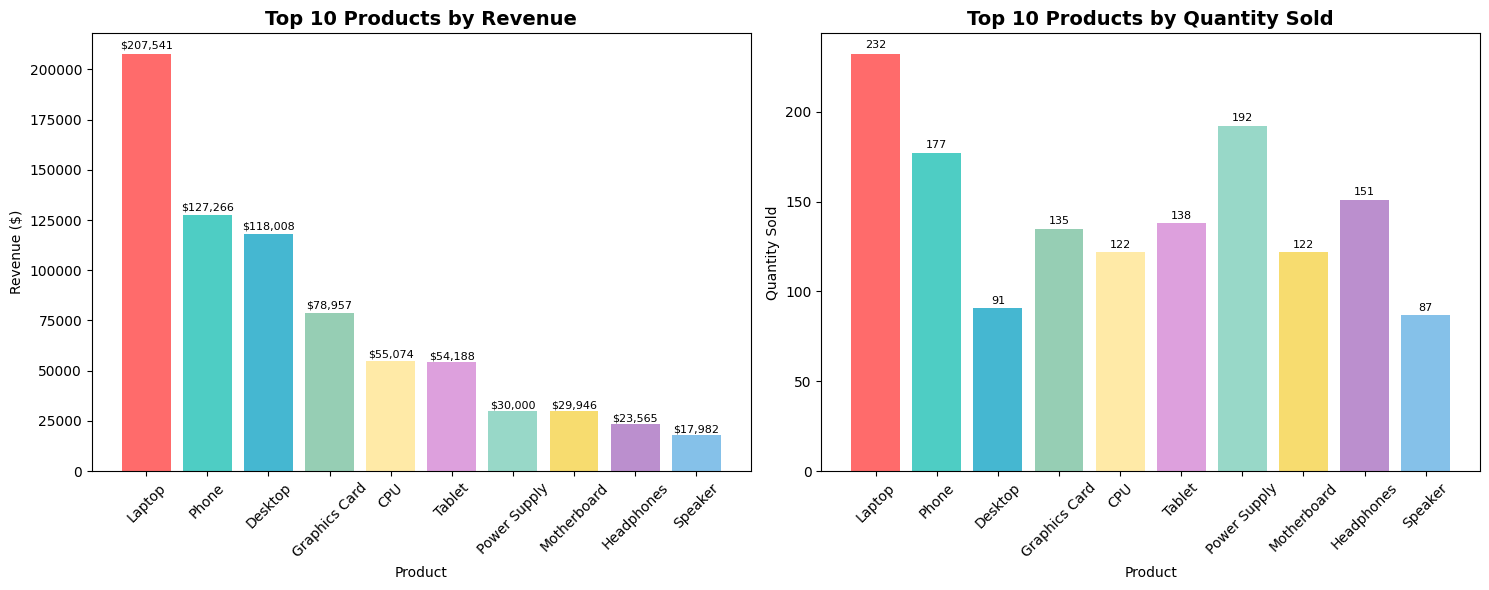


📅 MONTHLY SALES TREND:
  month  transactions  items_sold  monthly_revenue
2024-01            33         893        296029.27
2024-02            31         788        227944.72
2024-03            36         964        294412.95

🎯 PRODUCT PERFORMANCE METRICS:
      product  frequency  min_transaction  max_transaction  avg_transaction
        Mouse         10           386.23          1396.01      1105.517000
Graphics Card          9           572.54         23785.52      8772.991111
       Laptop          8          6630.12         44860.50     25942.612500
          RAM          7           360.16          4019.40      2127.228571
        Phone          7          6376.05         34831.70     18180.897143
      Charger          7           110.52          1690.50       785.320000
 Power Supply          6          2863.99          6384.40      5000.066667
       Webcam          5          1796.55          2800.64      2258.722000
    USB Cable          5           460.75           961.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Create and populate the SQLite database
def create_sales_database():
    """Create a SQLite database with sample sales data"""

    # Connect to database (creates file if it doesn't exist)
    conn = sqlite3.connect('sales_data.db')
    cursor = conn.cursor()

    # Create sales table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL,
            sale_date DATE
        )
    ''')

    # Generate 100 sample sales records
    import random
    from datetime import datetime, timedelta

    products = [
        ('Laptop', 899.99),
        ('Desktop', 1299.99),
        ('Mouse', 29.99),
        ('Keyboard', 79.99),
        ('Monitor', 299.99),
        ('Headphones', 149.99),
        ('Webcam', 89.99),
        ('Speaker', 199.99),
        ('Tablet', 399.99),
        ('Phone', 699.99),
        ('Charger', 39.99),
        ('USB Cable', 19.99),
        ('External HDD', 129.99),
        ('SSD', 179.99),
        ('RAM', 99.99),
        ('Graphics Card', 599.99),
        ('Motherboard', 249.99),
        ('CPU', 449.99),
        ('Power Supply', 159.99),
        ('Router', 119.99)
    ]

    sales_data = []
    start_date = datetime(2024, 1, 1)

    for i in range(1, 101):  # Generate 100 records
        # Random product
        product_name, base_price = random.choice(products)

        # Random quantity (1-50 items)
        quantity = random.randint(1, 50)

        # Price with some variation (±10%)
        price_variation = random.uniform(0.9, 1.1)
        price = round(base_price * price_variation, 2)

        # Random date within 3 months
        random_days = random.randint(0, 90)
        sale_date = start_date + timedelta(days=random_days)

        sales_data.append((i, product_name, quantity, price, sale_date.strftime('%Y-%m-%d')))

    # Sort by date for better organization
    sales_data.sort(key=lambda x: x[4])

    # Insert data (clear existing data first)
    cursor.execute('DELETE FROM sales')
    cursor.executemany('''
        INSERT INTO sales (id, product, quantity, price, sale_date)
        VALUES (?, ?, ?, ?, ?)
    ''', sales_data)

    # Commit changes and close
    conn.commit()
    conn.close()
    print(f"✅ Sales database created successfully with {len(sales_data)} records!")

# Step 2: Connect to database and run SQL queries
def analyze_sales_data():
    """Connect to SQLite database and perform sales analysis"""

    # Connect to the database
    conn = sqlite3.connect('sales_data.db')
    print("✅ Connected to sales_data.db")

    # Query 1: Basic sales summary by product
    query1 = """
        SELECT
            product,
            SUM(quantity) AS total_qty,
            SUM(quantity * price) AS revenue,
            AVG(price) AS avg_price,
            COUNT(*) AS num_transactions
        FROM sales
        GROUP BY product
        ORDER BY revenue DESC
    """

    # Load data into pandas DataFrame
    df_summary = pd.read_sql_query(query1, conn)

    print("\n📊 SALES SUMMARY BY PRODUCT:")
    print("=" * 50)
    print(df_summary.to_string(index=False))

    # Query 2: Overall totals
    query2 = """
        SELECT
            COUNT(*) as total_transactions,
            SUM(quantity) as total_items_sold,
            SUM(quantity * price) as total_revenue,
            AVG(quantity * price) as avg_transaction_value
        FROM sales
    """

    df_totals = pd.read_sql_query(query2, conn)

    print(f"\n📈 OVERALL SALES TOTALS:")
    print("=" * 30)
    print(f"Total Transactions: {df_totals['total_transactions'].iloc[0]}")
    print(f"Total Items Sold: {df_totals['total_items_sold'].iloc[0]}")
    print(f"Total Revenue: ${df_totals['total_revenue'].iloc[0]:,.2f}")
    print(f"Average Transaction Value: ${df_totals['avg_transaction_value'].iloc[0]:.2f}")

    # Close connection
    conn.close()

    return df_summary, df_totals

# Step 3: Create visualizations
def create_sales_charts(df_summary):
    """Create bar charts for sales data visualization"""

    # Set up the plotting style
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Chart 1: Revenue by Product (Top 10)
    df_top10 = df_summary.head(10)  # Show top 10 products by revenue
    bars1 = ax1.bar(df_top10['product'], df_top10['revenue'],
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
                           '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9'])
    ax1.set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Product')
    ax1.set_ylabel('Revenue ($)')
    ax1.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=8)

    # Chart 2: Quantity Sold by Product (Top 10)
    bars2 = ax2.bar(df_top10['product'], df_top10['total_qty'],
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
                           '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9'])
    ax2.set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Product')
    ax2.set_ylabel('Quantity Sold')
    ax2.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('sales_chart.png', dpi=300, bbox_inches='tight')
    print("\n📊 Charts saved as 'sales_chart.png'")
    plt.show()

# Step 4: Additional analysis function
def additional_insights():
    """Generate additional insights from 100 records"""

    conn = sqlite3.connect('sales_data.db')

    # Monthly sales trend
    monthly_query = """
        SELECT
            strftime('%Y-%m', sale_date) as month,
            COUNT(*) as transactions,
            SUM(quantity) as items_sold,
            SUM(quantity * price) as monthly_revenue
        FROM sales
        GROUP BY strftime('%Y-%m', sale_date)
        ORDER BY month
    """

    df_monthly = pd.read_sql_query(monthly_query, conn)

    print(f"\n📅 MONTHLY SALES TREND:")
    print("=" * 40)
    print(df_monthly.to_string(index=False))

    # Product performance metrics
    performance_query = """
        SELECT
            product,
            COUNT(*) as frequency,
            MIN(quantity * price) as min_transaction,
            MAX(quantity * price) as max_transaction,
            AVG(quantity * price) as avg_transaction
        FROM sales
        GROUP BY product
        HAVING COUNT(*) > 1
        ORDER BY frequency DESC
    """

    df_performance = pd.read_sql_query(performance_query, conn)

    print(f"\n🎯 PRODUCT PERFORMANCE METRICS:")
    print("=" * 50)
    print(df_performance.to_string(index=False))

    conn.close()

# Main execution function
def main():
    """Main function to run the complete analysis"""

    print("🚀 SALES DATA ANALYSIS TASK")
    print("=" * 40)

    # Step 1: Create database
    create_sales_database()

    # Step 2: Analyze data
    df_summary, df_totals = analyze_sales_data()

    # Step 3: Create visualizations
    create_sales_charts(df_summary)

    # Step 4: Additional insights
    additional_insights()

    print(f"\n✅ Analysis completed successfully!")
    print(f"📁 Files created:")
    print(f"   - sales_data.db (SQLite database)")
    print(f"   - sales_chart.png (Visualization)")

# Run the analysis
if __name__ == "__main__":
    main()